# EDA and FileHandling

In [7]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

## b)

In [42]:
current_directory = os.path.abspath('')
images = [(plt.imread(file), file.split('/')[-1].split('.')[0]) for file in glob.glob(f'{current_directory}/original_dataset/train/train/*.jpg')]

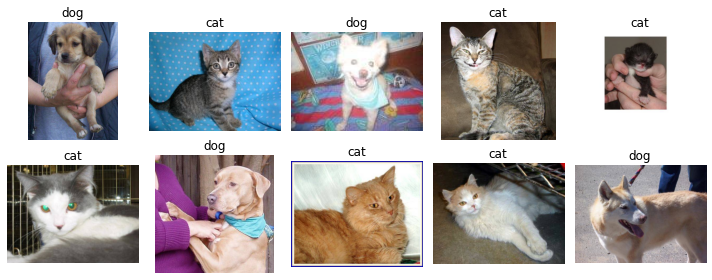

In [43]:
def plot_samples(data):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i][0], cmap = "gray")
        ax.set_title(data[i][1])
        ax.axis("off")
    fig.tight_layout()

plot_samples(images[:10])

## c)

In [47]:
folder_name_structure = ('experiment_small_data', 'experiment_tiny_data')

try:
    for folder_name in folder_name_structure:
        root_folder_name = f'{current_directory}/{folder_name}'
        os.mkdir(root_folder_name)
        for sub_folder_name in ['test', 'train', 'val']:
            os.mkdir(f'{root_folder_name}/{sub_folder_name}')
except:
    pass

## d)